<a href="https://colab.research.google.com/github/yashsahu4/House-Prices-Data/blob/main/AML_2203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv("/content/Housing Price data set.csv")

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [231]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [232]:
# Check for missing values
data.isnull().sum()


Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

In [233]:
# Drop the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)

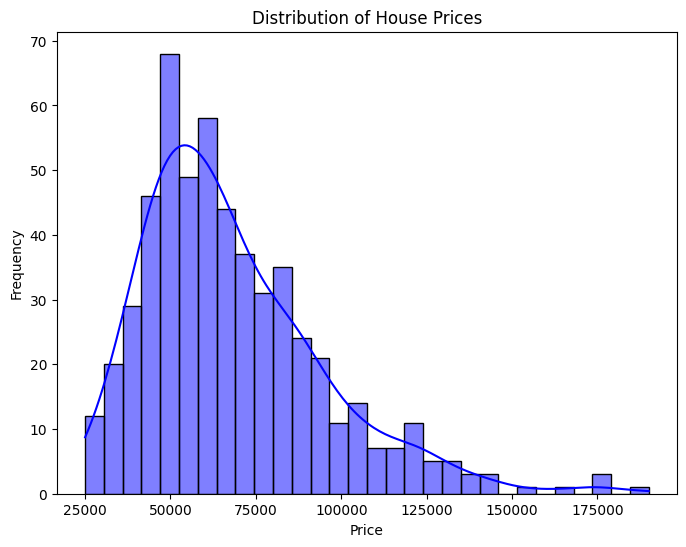

In [234]:
# Histogram of target variable (house prices)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

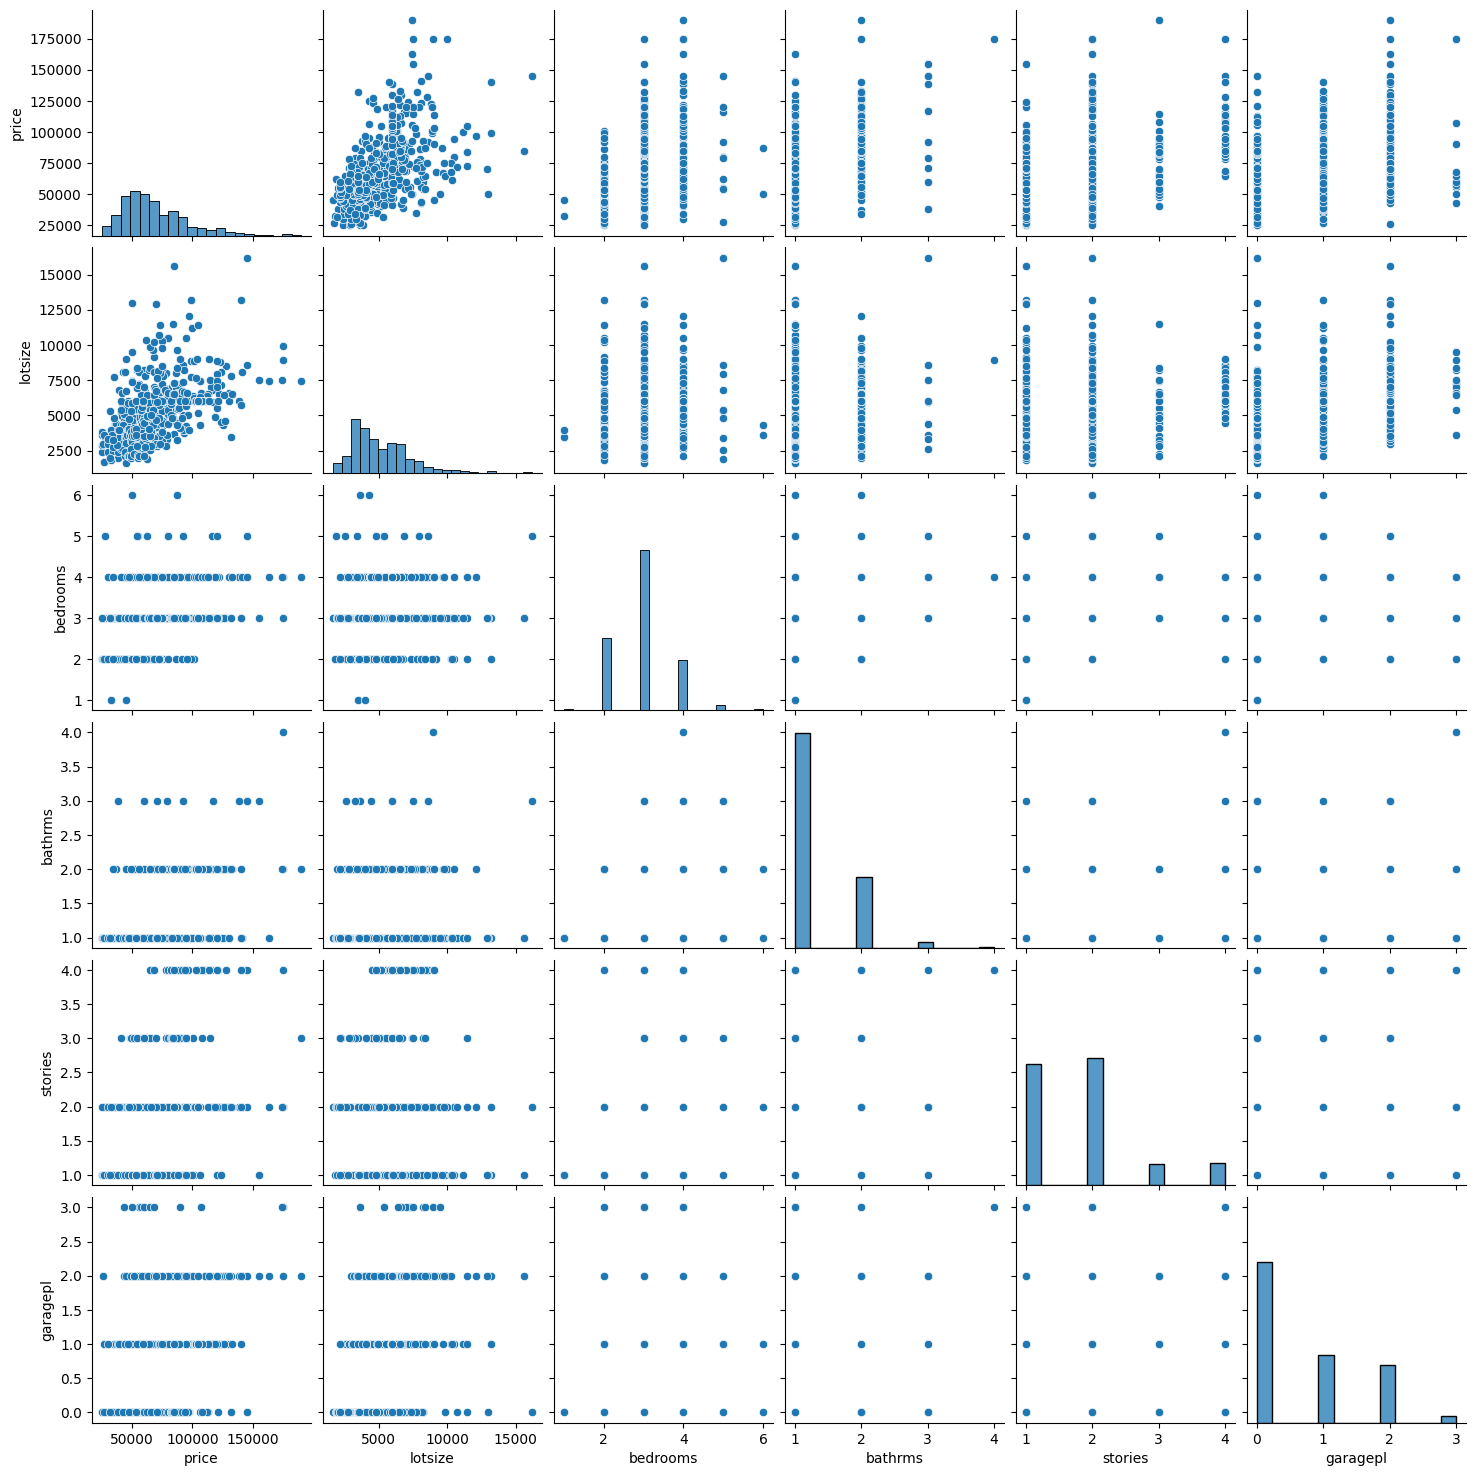

In [235]:
# Pairplot to visualize relationships between features
sns.pairplot(data, vars=['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl'])
plt.show()


<ipython-input-236-6f27b986d6c8>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



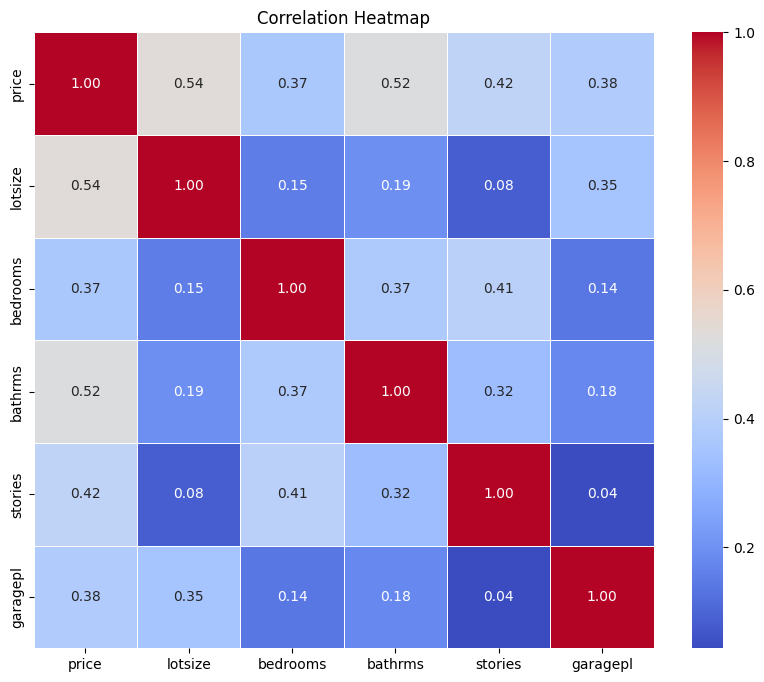

In [236]:
# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [237]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'], drop_first=True)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         546 non-null    float64
 1   lotsize       546 non-null    int64  
 2   bedrooms      546 non-null    int64  
 3   bathrms       546 non-null    int64  
 4   stories       546 non-null    int64  
 5   garagepl      546 non-null    int64  
 6   driveway_yes  546 non-null    uint8  
 7   recroom_yes   546 non-null    uint8  
 8   fullbase_yes  546 non-null    uint8  
 9   gashw_yes     546 non-null    uint8  
 10  airco_yes     546 non-null    uint8  
 11  prefarea_yes  546 non-null    uint8  
dtypes: float64(1), int64(5), uint8(6)
memory usage: 28.9 KB


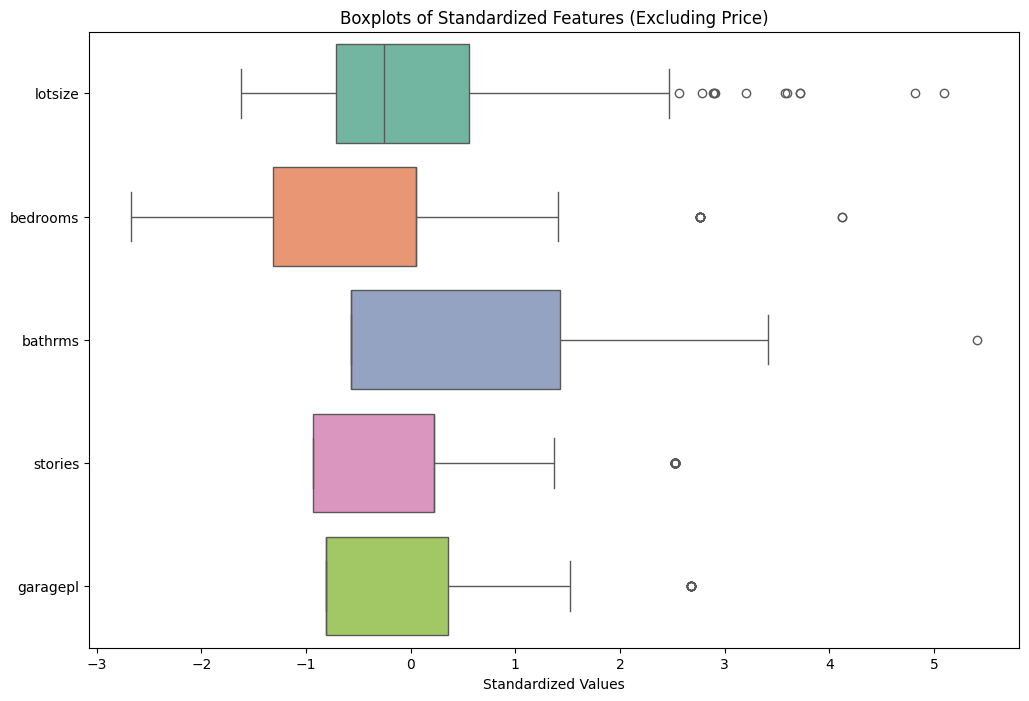

In [239]:
from sklearn.preprocessing import StandardScaler

# Exclude columns with binary values from the list of features
features = data.drop(columns=['price', 'driveway_yes', 'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes', 'prefarea_yes'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert the standardized features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Create box plots for the standardized features
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_features_df, orient='h', palette='Set2')
plt.title("Boxplots of Standardized Features (Excluding Price)")
plt.xlabel("Standardized Values")
plt.show()


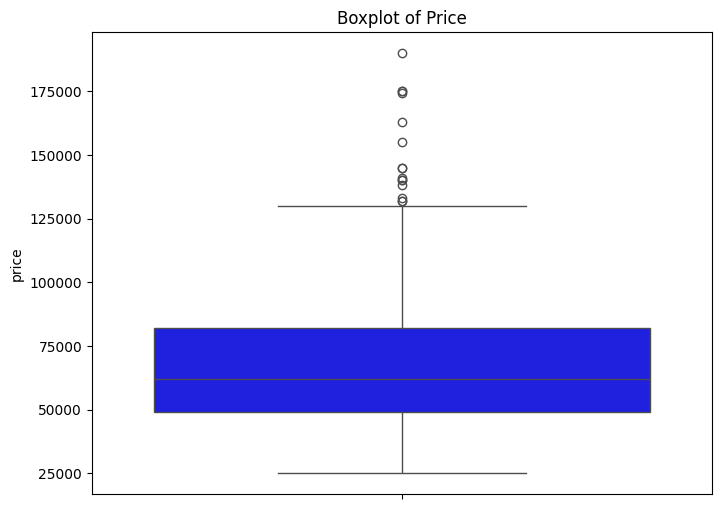

Number of outliers: 51


In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Separate box plot for 'price' feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['price'], color='blue')
plt.title("Boxplot of Price")
plt.show()

# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(data))
threshold = 3
outliers = np.where(z_scores > threshold)
# Check the length of one of the arrays to determine the number of outliers
num_outliers = len(outliers[0])
print("Number of outliers:", num_outliers)



In [241]:
import plotly.graph_objects as go

# Create a 3D scatter plot
fig = go.Figure()

# Add a scatter trace for the main data
fig.add_trace(go.Scatter3d(x=data['lotsize'], y=data['bedrooms'], z=data['price'],
                           mode='markers', marker=dict(size=5, color='blue'),
                           name='Data'))

# Add a scatter trace for the outliers
outlier_indices = outliers[0]  # Assuming outliers is the output of your outlier detection
outlier_data = data.iloc[outlier_indices]
fig.add_trace(go.Scatter3d(x=outlier_data['lotsize'], y=outlier_data['bedrooms'], z=outlier_data['price'],
                           mode='markers', marker=dict(size=10, color='red'),
                           name='Outliers'))

# Update layout
fig.update_layout(title="3D Scatter Plot of Lotsize, Bedrooms, and Price",
                  scene=dict(xaxis_title="Lotsize",
                             yaxis_title="Bedrooms",
                             zaxis_title="Price"))

# Show the plot
fig.show()


In [242]:
# Drop outliers from the original dataset
data.drop(index=outliers[0], inplace=True)


In [243]:
# Feature Selection and Engineering
# Selecting relevant features
features = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway_yes', 'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes', 'garagepl', 'prefarea_yes']
X = data[features]
y = data['price']

In [244]:
data

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1,0,1,0,0,0
1,38500.0,4000,2,1,1,0,1,0,0,0,0,0
2,49500.0,3060,3,1,1,0,1,0,0,0,0,0
3,60500.0,6650,3,1,2,0,1,1,0,0,0,0
4,61000.0,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1,1,0,0,1,0
542,94000.0,6000,3,2,4,0,1,0,0,0,1,0
543,103000.0,6000,3,2,4,1,1,1,0,0,1,0
544,105000.0,6000,3,2,2,1,1,1,0,0,1,0


In [245]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate error metrics
def calculate_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, rmse, mae
# Function to calculate error metrics including R-squared
def calculate_error_with_r2(y_true, y_pred):
    mse, rmse, mae = calculate_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Define a list of models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Random Forest Regression", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("SVR", SVR()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("DecisionTreeRegressor", DecisionTreeRegressor())
]


# Train and evaluate each model
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse, rmse, mae, r2 = calculate_error_with_r2(y_test, y_pred)
    print(f"Model: {name}")
    print("Test Set Error Metrics:")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R-squared:", r2)
    print("---------------------------------------")



Model: Linear Regression
Test Set Error Metrics:
MSE: 128808666.23187414
RMSE: 11349.390566540309
MAE: 8659.987755198865
R-squared: 0.740547729753872
---------------------------------------
Model: Ridge Regression
Test Set Error Metrics:
MSE: 128740205.3383601
RMSE: 11346.374105341323
MAE: 8652.910734579069
R-squared: 0.7406856267973312
---------------------------------------
Model: Lasso Regression
Test Set Error Metrics:
MSE: 128804861.44726282
RMSE: 11349.222944645278
MAE: 8659.48211989818
R-squared: 0.7405553935239744
---------------------------------------
Model: Random Forest Regression
Test Set Error Metrics:
MSE: 160350353.4908208
RMSE: 12662.952005390402
MAE: 9946.627088888888
R-squared: 0.6770150296171009
---------------------------------------
Model: SVR
Test Set Error Metrics:
MSE: 545558434.8152683
RMSE: 23357.19235728619
MAE: 18585.213484637243
R-squared: -0.0988885965944386
---------------------------------------
Model: KNeighborsRegressor
Test Set Error Metrics:
MSE: 18

In [246]:
from sklearn.linear_model import Ridge

# Create and fit Ridge Regression model
ridge_reg = Ridge()
ridge_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Calculate error metrics for Ridge Regression
mse_ridge, rmse_ridge, mae_ridge, r2_ridge = calculate_error_with_r2(y_test, y_pred_ridge)
print("Ridge Regression Error Metrics:")
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)
print("R-squared:", r2_ridge)

Ridge Regression Error Metrics:
MSE: 128740205.3383601
RMSE: 11346.374105341323
MAE: 8652.910734579069
R-squared: 0.7406856267973312


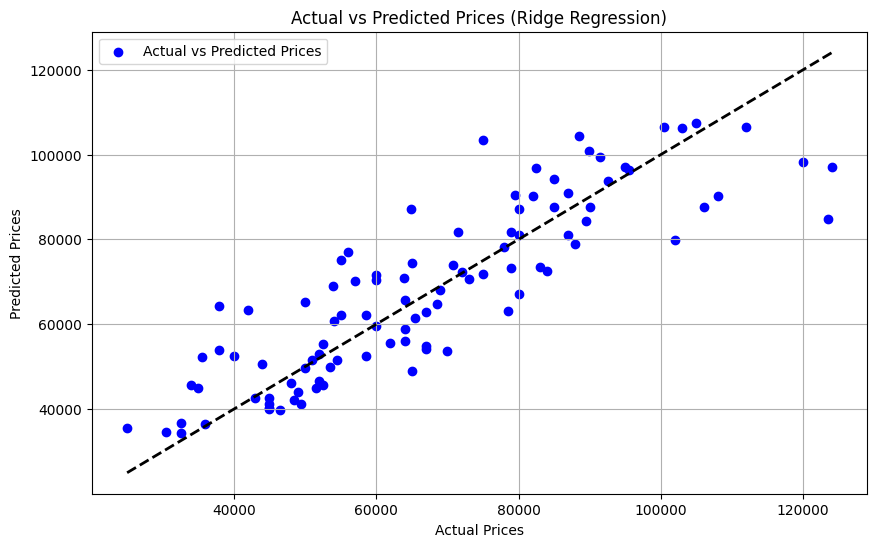

In [247]:
import matplotlib.pyplot as plt

# Scatter plot of actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plot the diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()


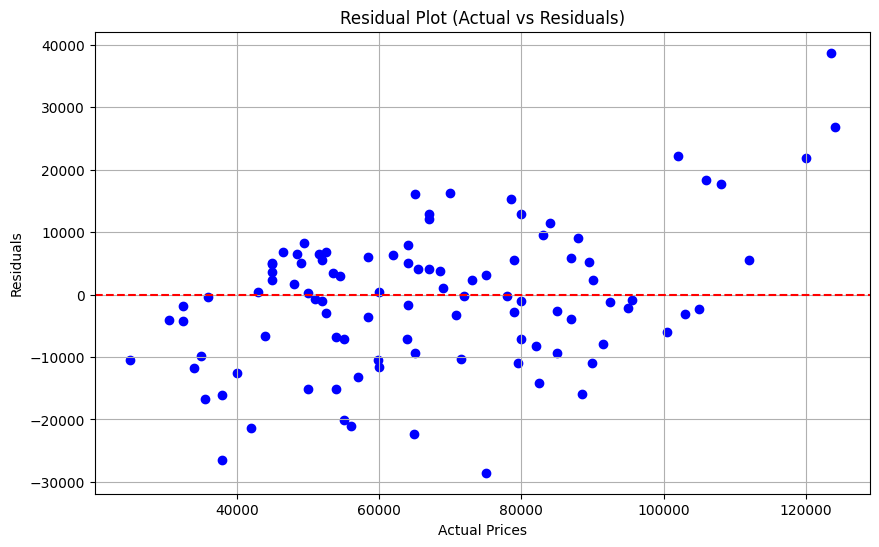

In [248]:
residuals = y_test - y_pred_ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (Actual vs Residuals)')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


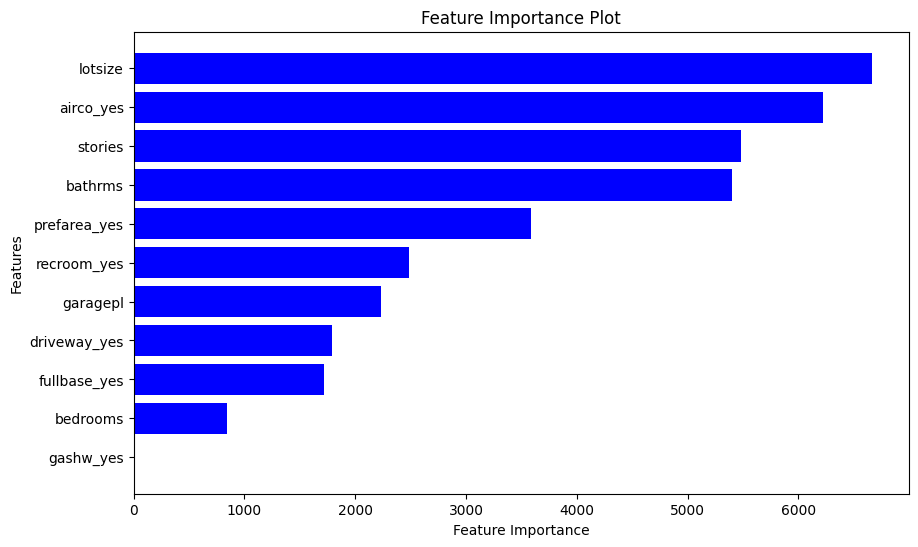

In [249]:
plt.figure(figsize=(10, 6))
feature_importance = ridge_reg.coef_
sorted_indices = np.argsort(feature_importance)
plt.barh(X.columns[sorted_indices], feature_importance[sorted_indices], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()
